In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
def compute_accuracy(Y_true, Y_pred):
    correctly_predicted = 0
    # iterating over every label and checking it with the true sample
    for true_label, predicted in zip(Y_true, Y_pred):
        if true_label == predicted:
            correctly_predicted += 1
    # computing the accuracy score
    accuracy_score = correctly_predicted / len(Y_true)
    return accuracy_score

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df=pd.read_csv("C:\\Users\\varun\\Downloads\\water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


<Axes: >

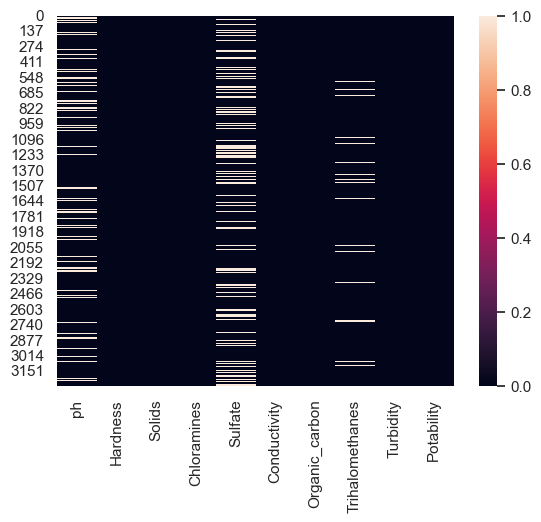

In [ ]:
#Visualization of the dataset
sns.heatmap(df.isnull())

<Axes: >

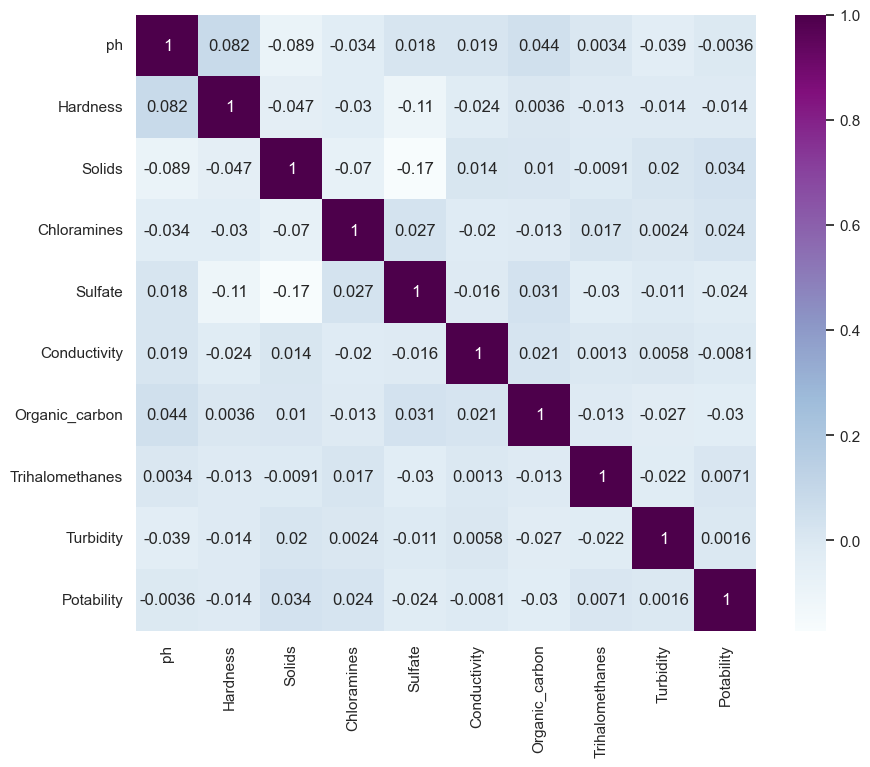

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='BuPu')

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


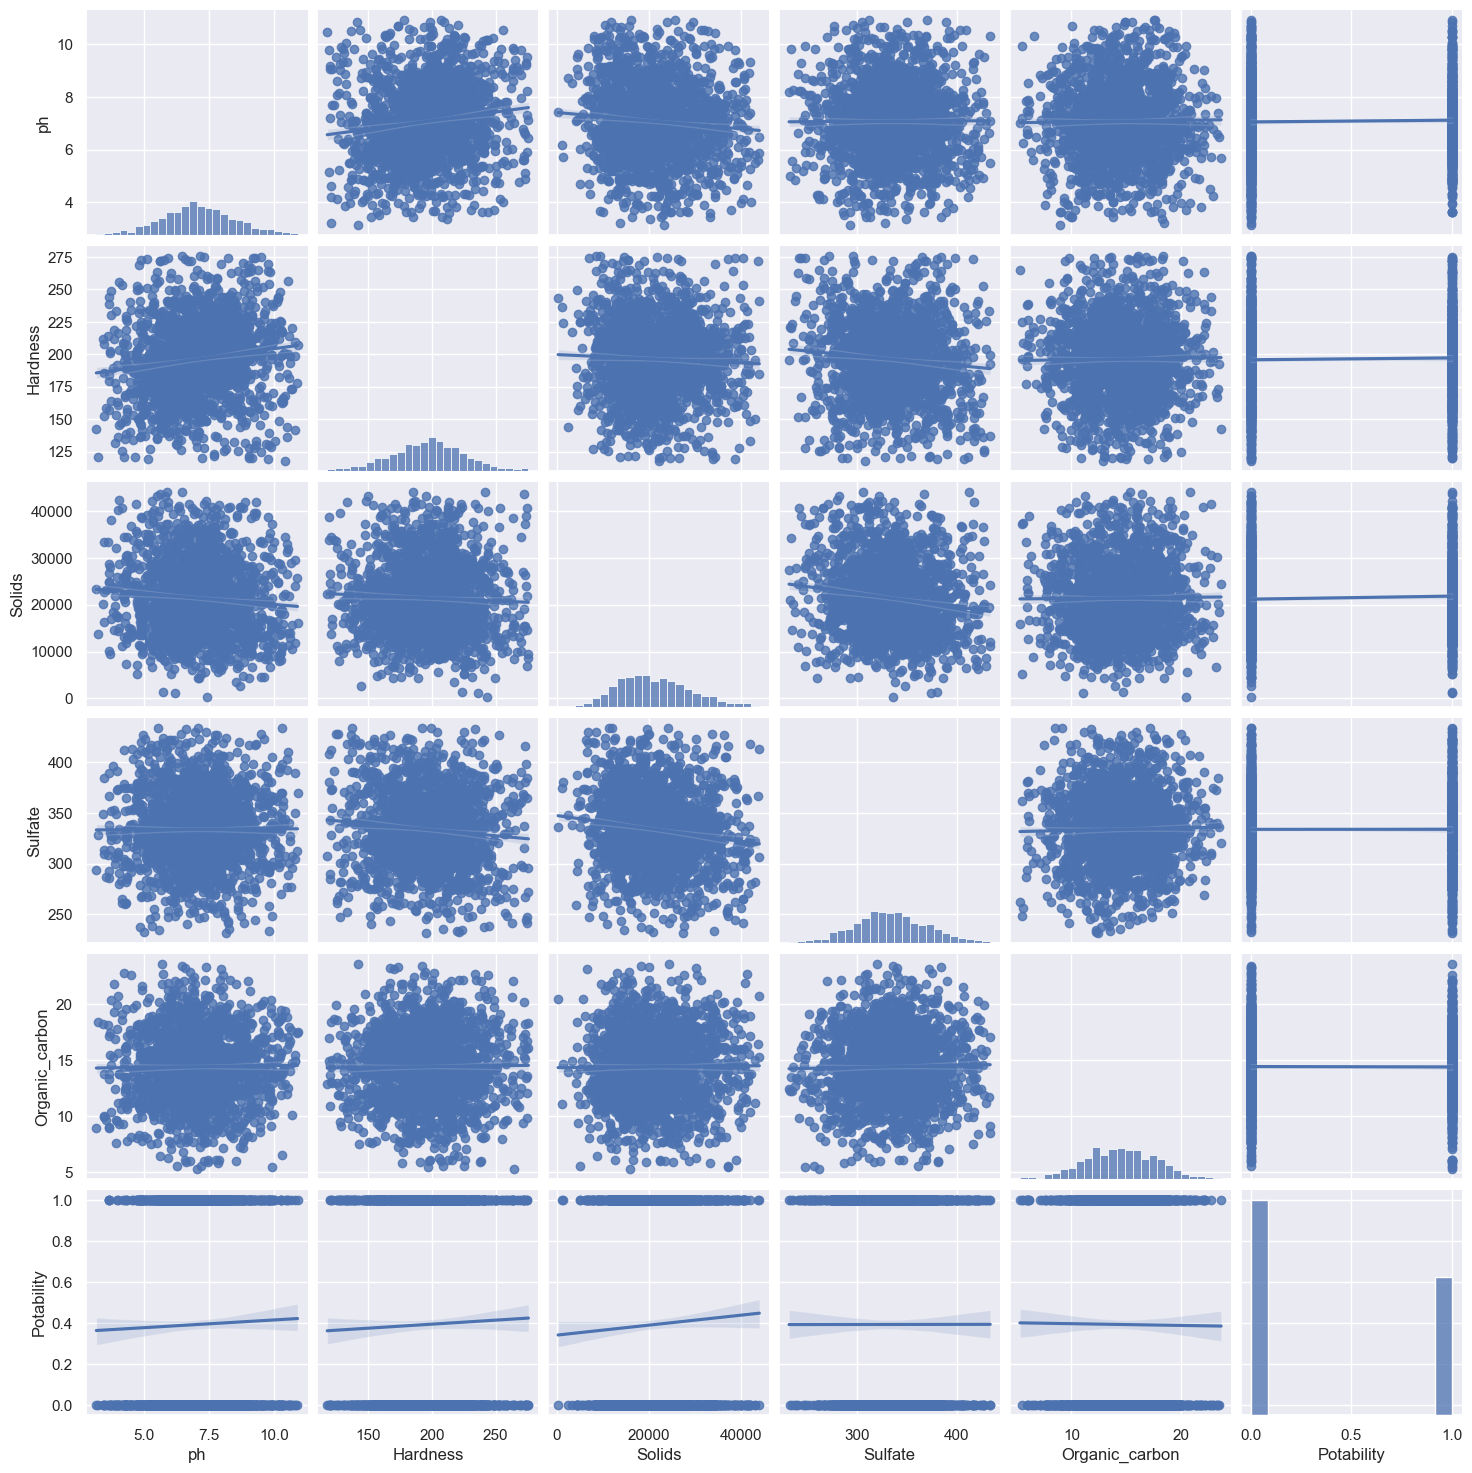

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


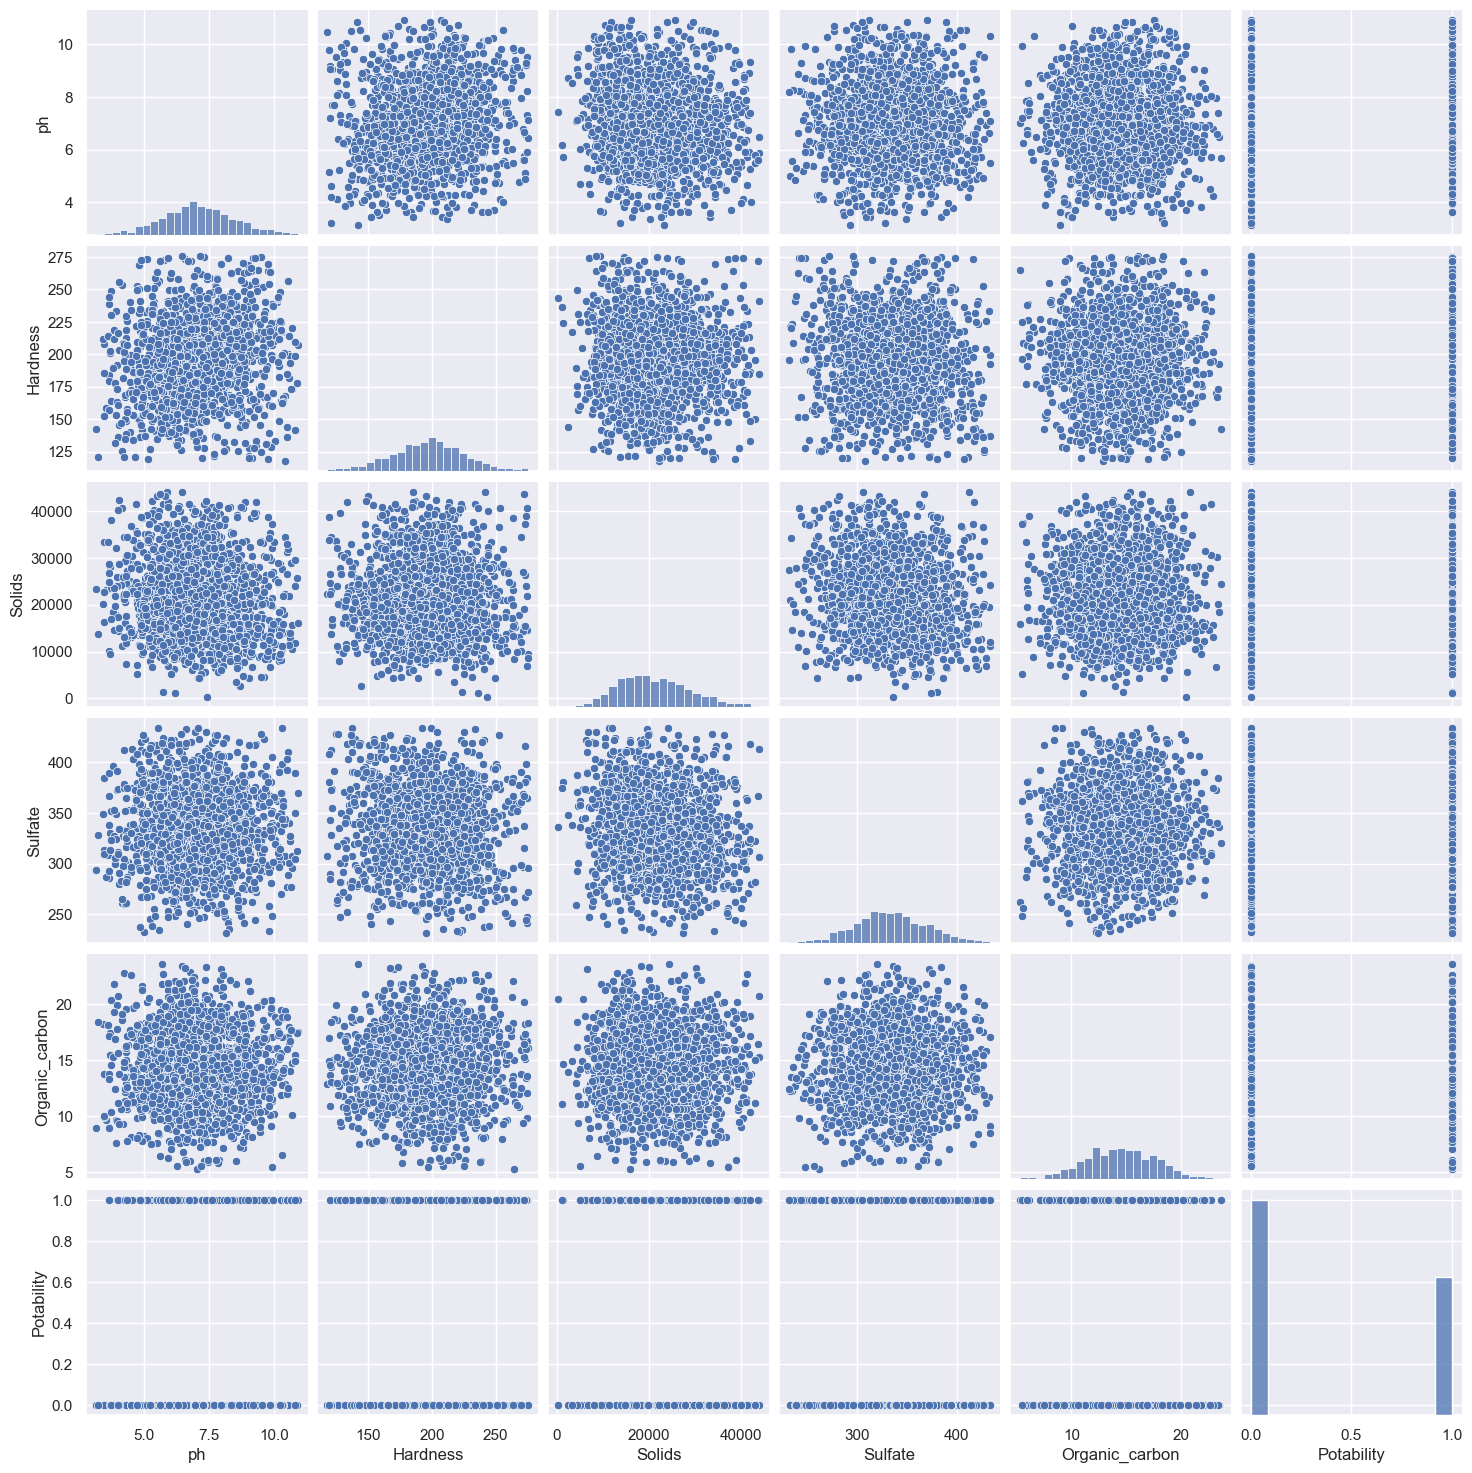

In [ ]:
#with regression
sns.pairplot(df, kind="reg")
plt.show()

#without regression
sns.pairplot(df, kind="scatter")
plt.show()

In [ ]:
#Cleaning the data
df.dropna(inplace=True)

for i in df.columns:
    out=df[i]
    IQR = stats.iqr(out, interpolation = 'midpoint')
    Q1 = np.percentile(out, 25)
    Q3 = np.percentile(out, 75)
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5* IQR
    df = df.drop(df[(df[i]<lower) | (df[i]>upper)].index)

df.drop({'Chloramines','Conductivity','Trihalomethanes','Turbidity'},axis=1,inplace=True)
df

,ph,Hardness,Solids,Sulfate,Organic_carbon,Potability
3,8.316766,214.373394,22018.417441,356.886136,18.436524,0
4,9.092223,181.101509,17978.986339,310.135738,11.558279,0
5,5.584087,188.313324,28748.687739,326.678363,8.399735,0
6,10.223862,248.071735,28749.716544,393.663396,13.789695,0
7,8.635849,203.361523,13672.091764,303.309771,12.363817,0
...,...,...,...,...,...,...
3264,5.893103,239.269481,20526.666156,341.256362,18.963707,1
3265,8.197353,203.105091,27701.794055,328.886838,14.250875,1
3267,8.989900,215.047358,15921.412018,312.931022,9.899115,1
3268,6.702547,207.321086,17246.920347,304.510230,16.217303,1


In [ ]:
#Scaling the data
scaled_df=scaler.fit_transform(df)
sdf=pd.DataFrame(scaled_df,columns=df.columns)

In [ ]:
y=sdf['Potability']
x=sdf.drop('Potability',axis=1)

In [ ]:
sdf.columns

Index(['ph', 'Hardness', 'Solids', 'Sulfate', 'Organic_carbon', 'Potability'], dtype='object')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
scaler.fit(x_train)
scaler.fit_transform(x_test)

array([[0.46971497, 0.58386539, 0.66422609, 0.4504435 , 0.82321665],
       [0.85658891, 0.26508007, 0.65856325, 0.09854129, 0.4027965 ],
       [0.64648354, 0.27266349, 0.15637282, 0.95029582, 0.6002201 ],
       ...,
       [0.59255344, 0.57425581, 0.59244178, 0.4824675 , 0.40239267],
       [0.6719751 , 0.63380934, 0.61974483, 0.36676735, 0.29904988],
       [0.72926765, 0.24036601, 0.00979473, 0.60541967, 0.23145256]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X is your features and y is your target
X = x_train
y = y_train

# Set the parameters for grid search
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'leaf_size': [10, 20, 30, 40, 50]}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

print("Best parameters found by grid search:", grid_search.best_params_)

Best parameters found by grid search: {'leaf_size': 10, 'n_neighbors': 10}


In [ ]:
# Creating knn model
knn= KNeighborsClassifier(n_neighbors=9, leaf_size=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=9)

In [ ]:
pred = knn.predict(x_test)

In [ ]:
score=compute_accuracy(y_test, pred)
score*100

65.17690875232775

In [ ]:
cm_df=pd.DataFrame(confusion_matrix(y_test,pred))
cm_df.columns=['Predicted 0','Predicted 1']
cm_df=cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,261,65
Actual 1,122,89


In [ ]:
y_test

1267    1.0
654     1.0
802     0.0
768     0.0
1365    0.0
       ... 
1115    1.0
701     0.0
952     0.0
1763    1.0
1304    1.0
Name: Potability, Length: 358, dtype: float64

<Axes: >

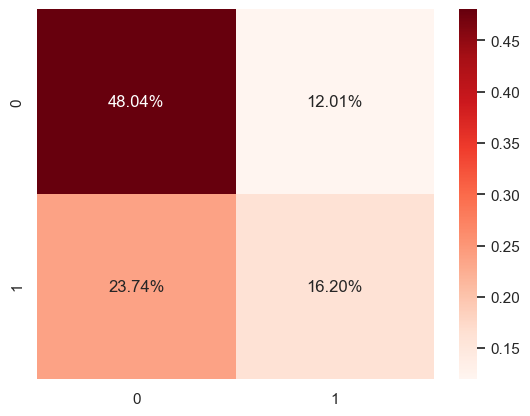

In [ ]:
cm1 = confusion_matrix(y_test, pred)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [ ]:
import pickle as pkl
pickle_out=open("KNN.pkl","wb")
pkl.dump(knn,pickle_out)
pickle_out.close()

In [ ]:
pickle_out1=open("SCALER.pkl",'wb')
pkl.dump(scaler,pickle_out1)
pickle_out1.close()